In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv(r'C:\Users\HP\Downloads\elli lilly\dataset\train.csv')

In [4]:
train.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [4]:
train.shape

(15681, 18)

In [5]:
train.drop(['instance_id','track_name'], axis=1, inplace= True)

In [6]:
train.isnull().sum()

popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [7]:
for feature in train.columns[:]:
    print(feature,':',len(train[feature].unique()),'labels')

popularity : 12744 labels
acousticness : 15681 labels
danceability : 15126 labels
duration_ms : 14012 labels
energy : 14372 labels
instrumentalness : 11220 labels
key : 12 labels
liveness : 15681 labels
loudness : 10474 labels
voice_gender : 4 labels
mode : 4 labels
speechiness : 15656 labels
tempo : 12332 labels
musician_category : 4 labels
valence : 15005 labels
music_genre : 7 labels


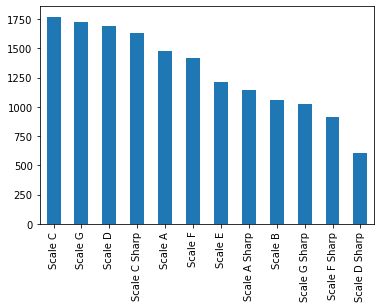

In [8]:
train['key'].value_counts().plot.bar()

### Feature encoding for 'key' column


In [9]:
key_Dict = train['key'].value_counts()

In [11]:
train['Encoded_key'] = train['key'].map(key_Dict)

In [12]:
train.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre,Encoded_key
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz,1210
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz,1479
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap,1695
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock,1695
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical,916


In [13]:
voice_gender

In [14]:
train['voice_gender'].value_counts()

Female    5050
Male      4953
Both      4913
Name: voice_gender, dtype: int64

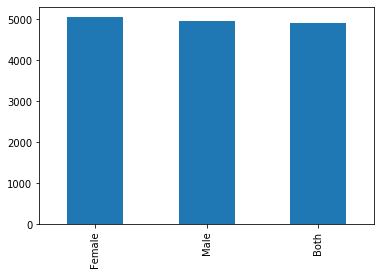

In [16]:
train['voice_gender'].value_counts().plot.bar()

In [15]:
train['voice_gender'].unique()


array([nan, 'Male', 'Female', 'Both'], dtype=object)

In [18]:
def impute_nan_most_frequent_category(DataFrame,ColName):
     most_frequent_category=DataFrame[ColName].mode()[0]
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [20]:
impute_nan_most_frequent_category(train,'voice_gender')

In [22]:
train.drop(['voice_gender'], axis=1, inplace= True)

In [23]:
train.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,musician_category,valence,music_genre,Encoded_key,voice_gender_Imputed
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,0.147134,-14.140,Major,0.046404,143.78799999999998,Band,0.598965,Jazz,1210,Female
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,0.174655,-13.716,?,0.039949,?,Band,0.357194,Jazz,1479,Male
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,0.042030,-4.995,Major,0.119917,105.01799999999999,Band,0.635525,Rap,1695,Female
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,0.124637,-4.262,Major,0.167493,?,Duet,0.983750,Rock,1695,Both
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,0.134782,-26.922,Minor,0.039139,112.18299999999999,Band,0.074412,Classical,916,Female


In [30]:
key_Dict = train['voice_gender_Imputed'].value_counts()

In [31]:
train['Encoded_voice_gender_Imputed'] = train['voice_gender_Imputed'].map(key_Dict)

In [32]:
train.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,musician_category,valence,music_genre,Encoded_key,voice_gender_Imputed,Encoded_voice_gender_Imputed
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,0.147134,-14.140,Major,0.046404,143.78799999999998,Band,0.598965,Jazz,1210,F,5815
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,0.174655,-13.716,?,0.039949,?,Band,0.357194,Jazz,1479,M,4953
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,0.042030,-4.995,Major,0.119917,105.01799999999999,Band,0.635525,Rap,1695,F,5815
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,0.124637,-4.262,Major,0.167493,?,Duet,0.983750,Rock,1695,B,4913
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,0.134782,-26.922,Minor,0.039139,112.18299999999999,Band,0.074412,Classical,916,F,5815


In [22]:
train['mode'].value_counts()

Major    9210
Minor    5357
?        1079
Name: mode, dtype: int64

In [25]:
train['mode'].unique()

array(['Major', '?', 'Minor', nan], dtype=object)

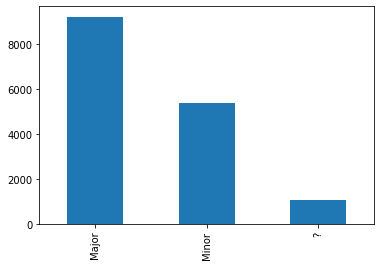

In [26]:
train['mode'].value_counts().plot.bar()

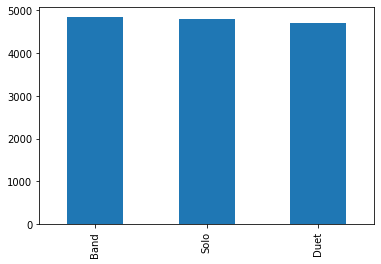

In [27]:
train['musician_category'].value_counts().plot.bar()

popularity column

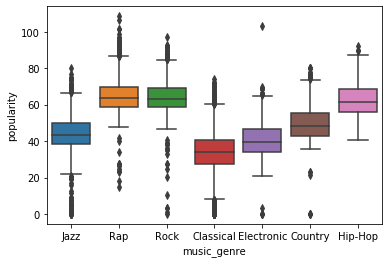

In [34]:
sns.boxplot(x='music_genre',y='popularity', data=train)

In [33]:
def impute_nan(train, variable, median):
    train[variable+'_median']=train[variable].fillna(median)

In [34]:
median=train.popularity.median()
impute_nan(train,'popularity', median)

In [35]:
print(train['popularity'].std())
print(train['popularity_median'].std())

17.679788585680157
17.32630862401102


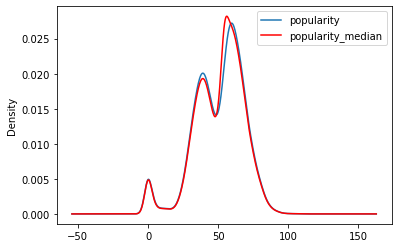

In [36]:
fig= plt.figure()
ax=fig.add_subplot(111)
train['popularity'].plot(kind='kde', ax=ax)
train['popularity_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


### acousticness

In [37]:
median1=train.danceability.mean()
impute_nan(train,'danceability', median1)

In [38]:
print(train['danceability'].std())
print(train['danceability_median'].std())

0.2150447283098581
0.21119766178864663


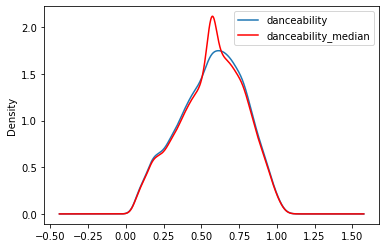

In [39]:
fig= plt.figure()
ax=fig.add_subplot(111)
train['danceability'].plot(kind='kde', ax=ax)
train['danceability_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


### duration_ms


In [40]:
median2=train.duration_ms.median()
impute_nan(train,'duration_ms', median2)

In [41]:
print(train['duration_ms'].std())
print(train['duration_ms_median'].std())

156831.18267040895
156363.03040448244


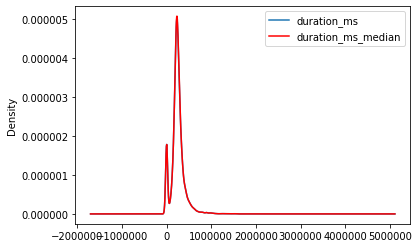

In [42]:
fig= plt.figure()
ax=fig.add_subplot(111)
train['duration_ms'].plot(kind='kde', ax=ax)
train['duration_ms_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### energy

In [43]:
median3=train.energy.median()
impute_nan(train,'energy', median3)

In [44]:
print(train['energy'].std())
print(train['energy_median'].std())

0.514145061936414
0.5127050663430495


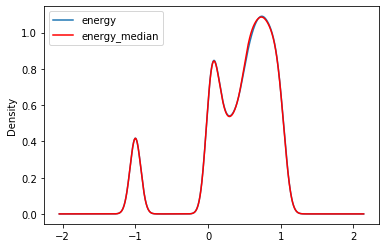

In [45]:
fig= plt.figure()
ax=fig.add_subplot(111)
train['energy'].plot(kind='kde', ax=ax)
train['energy_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [46]:
train['energy_median'].isnull().sum()

0

In [47]:
median4=train.instrumentalness.median()
impute_nan(train,'instrumentalness', median4)

In [48]:
print(train['instrumentalness'].std())
print(train['instrumentalness_median'].std())

0.3957879211677597
0.395116870505016


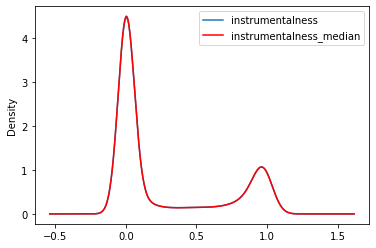

In [49]:
fig= plt.figure()
ax=fig.add_subplot(111)
train['instrumentalness'].plot(kind='kde', ax=ax)
train['instrumentalness_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### loudness

In [50]:
median5=train.loudness.median()
impute_nan(train,'loudness', median5)

In [51]:
print(train['loudness'].std())
print(train['loudness_median'].std())

8.66336389155123
8.65461243176165


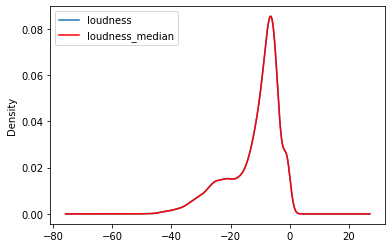

In [52]:
fig= plt.figure()
ax=fig.add_subplot(111)
train['loudness'].plot(kind='kde', ax=ax)
train['loudness_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
### speechiness

In [53]:
median6=train.speechiness.median()
impute_nan(train,'speechiness', median6)

In [54]:
print(train['speechiness'].std())
print(train['speechiness_median'].std())

0.10564670633720295
0.10557566062851564


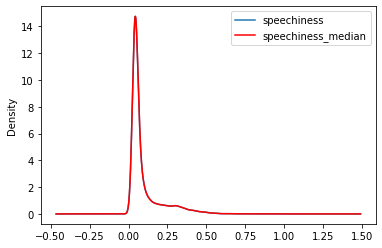

In [55]:
fig= plt.figure()
ax=fig.add_subplot(111)
train['speechiness'].plot(kind='kde', ax=ax)
train['speechiness_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [56]:
median7=train.valence.median()
impute_nan(train,'valence', median7)

In [57]:
print(train['valence'].std())
print(train['valence_median'].std())

0.2772195966342224
0.27119621921074333


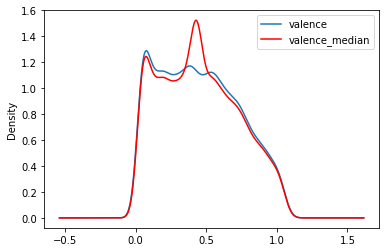

In [58]:
fig= plt.figure()
ax=fig.add_subplot(111)
train['valence'].plot(kind='kde', ax=ax)
train['valence_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [61]:
train.head()

,acousticness,liveness,mode,speechiness,tempo,musician_category,music_genre,Encoded_key,voice_gender_Imputed,Encoded_voice_gender_Imputed,popularity_median,danceability_median,duration_ms_median,energy_median,instrumentalness_median,loudness_median,speechiness_median,valence_median
0,0.970522,0.147134,Major,0.046404,143.78799999999998,Band,Jazz,1210,F,5815,49.178,0.580508,214625.776,0.192107,0.000000,-14.140,0.046404,0.598965
1,1.009380,0.174655,?,0.039949,?,Band,Jazz,1479,M,4953,59.827,0.687542,216232.195,0.265942,0.000031,-13.716,0.039949,0.357194
2,0.020041,0.042030,Major,0.119917,105.01799999999999,Band,Rap,1695,F,5815,89.023,0.967948,273314.723,0.857411,0.000000,-4.995,0.119917,0.635525
3,0.010284,0.124637,Major,0.167493,?,Duet,Rock,1695,B,4913,55.762,0.616287,189189.605,0.970513,0.000220,-4.262,0.167493,0.983750
4,0.858769,0.134782,Minor,0.039139,112.18299999999999,Band,Classical,916,F,5815,45.095,0.280645,410136.987,0.114732,0.002753,-26.922,0.039139,0.074412


In [60]:
train.drop(['popularity','danceability','duration_ms','energy','instrumentalness','loudness','valence'], axis=1, inplace= True)

In [62]:
train.drop(['mode','tempo','musician_category'],axis=1, inplace= True)

In [65]:
train.head(10)

,acousticness,liveness,speechiness,music_genre,Encoded_key,Encoded_voice_gender_Imputed,popularity_median,danceability_median,duration_ms_median,energy_median,instrumentalness_median,loudness_median,speechiness_median,valence_median
0,0.970522,0.147134,0.046404,Jazz,1210,5815,49.178,0.580508,214625.776,0.192107,0.000000,-14.140,0.046404,0.598965
1,1.009380,0.174655,0.039949,Jazz,1479,4953,59.827,0.687542,216232.195,0.265942,0.000031,-13.716,0.039949,0.357194
2,0.020041,0.042030,0.119917,Rap,1695,5815,89.023,0.967948,273314.723,0.857411,0.000000,-4.995,0.119917,0.635525
3,0.010284,0.124637,0.167493,Rock,1695,4913,55.762,0.616287,189189.605,0.970513,0.000220,-4.262,0.167493,0.983750
4,0.858769,0.134782,0.039139,Classical,916,5815,45.095,0.280645,410136.987,0.114732,0.002753,-26.922,0.039139,0.074412
5,1.047458,0.161042,0.043902,Classical,1023,5815,54.109,0.436620,149956.385,0.015206,0.960473,-28.116,0.043902,0.156638
6,0.000459,0.079220,0.052014,Rap,1633,4953,64.265,0.968723,203145.857,-1.000000,0.000384,-7.266,0.052014,0.484246
7,0.086018,0.168890,0.039190,Rock,1479,5815,60.375,0.621977,248135.177,0.420478,0.075501,-16.505,0.039190,0.432478
8,0.090830,0.089873,0.070437,Rock,1479,4913,73.420,0.380147,275490.630,0.714246,0.000000,-5.972,0.070437,0.555169
9,1.014646,0.110850,0.065935,Jazz,1142,4913,34.034,0.672051,207299.190,0.048039,0.146346,-27.213,0.065935,0.590628


In [64]:
train.drop(['voice_gender_Imputed'],axis=1, inplace= True)

In [66]:
train['music_genre'].unique()

array(['Jazz', 'Rap', 'Rock', 'Classical', 'Electronic', 'Country',
       'Hip-Hop'], dtype=object)

In [67]:
datamapping={'Jazz':0, 'Rap':1, 'Rock':2, 'Classical':3, 'Electronic':4, 'Country':5,
       'Hip-Hop':6
    
}

In [68]:
train['music_genre']=train['music_genre'].map(datamapping)

In [69]:
train.head()

,acousticness,liveness,speechiness,music_genre,Encoded_key,Encoded_voice_gender_Imputed,popularity_median,danceability_median,duration_ms_median,energy_median,instrumentalness_median,loudness_median,speechiness_median,valence_median
0,0.970522,0.147134,0.046404,0,1210,5815,49.178,0.580508,214625.776,0.192107,0.000000,-14.140,0.046404,0.598965
1,1.009380,0.174655,0.039949,0,1479,4953,59.827,0.687542,216232.195,0.265942,0.000031,-13.716,0.039949,0.357194
2,0.020041,0.042030,0.119917,1,1695,5815,89.023,0.967948,273314.723,0.857411,0.000000,-4.995,0.119917,0.635525
3,0.010284,0.124637,0.167493,2,1695,4913,55.762,0.616287,189189.605,0.970513,0.000220,-4.262,0.167493,0.983750
4,0.858769,0.134782,0.039139,3,916,5815,45.095,0.280645,410136.987,0.114732,0.002753,-26.922,0.039139,0.074412


In [76]:
train.isnull().sum()

acousticness                     0
liveness                         0
speechiness                     26
Encoded_key                      0
Encoded_voice_gender_Imputed     0
popularity_median                0
danceability_median              0
duration_ms_median               0
energy_median                    0
instrumentalness_median          0
loudness_median                  0
speechiness_median               0
valence_median                   0
dtype: int64

In [70]:
y=train.loc[:,'music_genre'].values

In [71]:
train.drop(['music_genre'],axis=1, inplace= True)

In [77]:
train.drop(['speechiness'],axis=1, inplace= True)

In [78]:
X=train.iloc[:,:].values

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[460  18  45  48  13   9   0]
 [  6 510 114   0   1   0   7]
 [ 21  63 650   3   0   7   1]
 [ 49   0  11 728   7   2   0]
 [ 49   9  11   3  46   2   0]
 [ 38   2  51   3   2  59   0]
 [  6  70  10   0   2   1   0]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       593
           1       0.76      0.80      0.78       638
           2       0.73      0.87      0.79       745
           3       0.93      0.91      0.92       797
           4       0.65      0.38      0.48       120
           5       0.74      0.38      0.50       155
           6       0.00      0.00      0.00        89

    accuracy                           0.78      3137
   macro avg       0.65      0.59      0.60      3137
weighted avg       0.76      0.78      0.77      3137

0.7819572840293274


In [83]:
test= pd.read_csv(r'C:\Users\HP\Downloads\elli lilly\dataset\test.csv')

In [84]:
test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,?,0.051368,76.00399999999999,Band,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


In [85]:
test.isnull().sum()

instance_id            0
track_name             0
popularity           166
acousticness           0
danceability         139
duration_ms           21
energy                33
instrumentalness      23
key                    0
liveness               0
loudness               3
voice_gender         186
mode                  14
speechiness            7
tempo                  0
musician_category    312
valence              191
dtype: int64

In [86]:
test.drop(['instance_id','track_name'], axis=1, inplace= True)

In [87]:
key_Dict = test['key'].value_counts()

In [88]:
test['Encoded_key'] = test['key'].map(key_Dict)

In [89]:
def impute_nan_most_frequent_category(DataFrame,ColName):
     most_frequent_category=DataFrame[ColName].mode()[0]
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [90]:
impute_nan_most_frequent_category(test,'voice_gender')

In [91]:
test.drop(['voice_gender'], axis=1, inplace= True)

In [92]:
key_Dict = test['voice_gender_Imputed'].value_counts()

In [94]:
test['Encoded_voice_gender_Imputed'] = test['voice_gender_Imputed'].map(key_Dict)

In [95]:
def impute_nan(test, variable, median):
    test[variable+'_median']=test[variable].fillna(median)

In [96]:
median=test.popularity.median()
impute_nan(test,'popularity', median)

In [97]:
median1=test.danceability.mean()
impute_nan(test,'danceability', median1)

In [98]:
median2=test.duration_ms.median()
impute_nan(test,'duration_ms', median2)

In [99]:
median3=test.energy.median()
impute_nan(test,'energy', median3)

In [100]:
median4=test.instrumentalness.median()
impute_nan(test,'instrumentalness', median4)

In [101]:
median5=test.loudness.median()
impute_nan(test,'loudness', median5)

In [103]:
median6=test.speechiness.median()
impute_nan(test,'speechiness', median6)

In [104]:
median7=test.valence.median()
impute_nan(test,'valence', median7)

In [106]:
test.drop(['popularity','danceability','duration_ms','energy','instrumentalness','loudness','speechiness','valence'], axis=1, inplace= True)

In [107]:
test.drop(['mode','tempo','musician_category','voice_gender_Imputed'],axis=1, inplace= True)

In [108]:
print(train.shape)

(15681, 12)


In [109]:
print(test.shape)

(3921, 13)


In [110]:
train.head()


,acousticness,liveness,Encoded_key,Encoded_voice_gender_Imputed,popularity_median,danceability_median,duration_ms_median,energy_median,instrumentalness_median,loudness_median,speechiness_median,valence_median
0,0.970522,0.147134,1210,5815,49.178,0.580508,214625.776,0.192107,0.000000,-14.140,0.046404,0.598965
1,1.009380,0.174655,1479,4953,59.827,0.687542,216232.195,0.265942,0.000031,-13.716,0.039949,0.357194
2,0.020041,0.042030,1695,5815,89.023,0.967948,273314.723,0.857411,0.000000,-4.995,0.119917,0.635525
3,0.010284,0.124637,1695,4913,55.762,0.616287,189189.605,0.970513,0.000220,-4.262,0.167493,0.983750
4,0.858769,0.134782,916,5815,45.095,0.280645,410136.987,0.114732,0.002753,-26.922,0.039139,0.074412


In [111]:
test.head()

,acousticness,key,liveness,Encoded_key,Encoded_voice_gender_Imputed,popularity_median,danceability_median,duration_ms_median,energy_median,instrumentalness_median,loudness_median,speechiness_median,valence_median
0,0.823765,Scale A Sharp,0.120392,269,1492,26.101,0.115490,211462.287,0.125325,0.945272,-25.541,0.038657,0.041238
1,0.015441,Scale E,0.406722,304,1238,66.325,0.592838,249151.238,0.870798,0.000108,-3.905,0.051368,0.456309
2,0.001006,Scale C,0.084608,433,1191,71.871,0.510340,215693.240,0.683077,0.000000,-6.825,0.034303,0.193332
3,0.315650,Scale A,0.276811,359,1191,56.151,0.338336,307056.179,0.608904,0.000000,-8.382,0.036934,0.214906
4,0.038336,Scale D,0.301726,413,1492,43.687,0.773904,352802.872,0.955500,0.000007,-4.733,0.079688,0.757347


In [112]:
test.drop(['key'],axis=1, inplace= True)

In [113]:
test_pred=rfc.predict(test)

In [114]:
df= pd.read_csv(r'C:\Users\HP\Downloads\elli lilly\dataset\test.csv')

In [117]:
sample= pd.read_csv(r'C:\Users\HP\Downloads\elli lilly\dataset\sample_submission.csv')

In [116]:
Index=df['instance_id']

In [115]:
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,?,0.051368,76.00399999999999,Band,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


In [118]:
sample.head()

,instance_id,music_genre
0,MSC_83537.0,Jazz
1,MSC_22044.0,Jazz
2,MSC_62017.0,Rap
3,MSC_76365.0,Rock
4,MSC_71493.0,Classical


In [119]:
submission_df = pd.DataFrame({
                  "instance_id": Index, 
                  "music_genre": test_pred})

In [120]:
submission_df.head()

,instance_id,music_genre
0,MSC_70753.0,0
1,MSC_24064.0,2
2,MSC_22731.0,2
3,MSC_32095.0,2
4,MSC_24198.0,2


In [121]:
datamapping1={0:'Jazz', 1:'Rap',2:'Rock', 3:'Classical', 4:'Electronic', 5:'Country',
       6:'Hip-Hop'
    
}

In [123]:
submission_df ['music_genre']=submission_df ['music_genre'].map(datamapping1)

In [124]:
submission_df.head()

,instance_id,music_genre
0,MSC_70753.0,Jazz
1,MSC_24064.0,Rock
2,MSC_22731.0,Rock
3,MSC_32095.0,Rock
4,MSC_24198.0,Rock


In [125]:
print(submission_df.shape)

(3921, 2)


In [127]:
submission_df.to_csv(r'C:\Users\HP\Downloads\elli lilly\dataset\submission_1.csv', index=False, header=True)